<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · Práctica</p>
<p style="margin: 0; text-align:right;">2019-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Sistema automático para la detección de COVID-19 en radiografías

Una de las aplicaciones de AI es el procesamiendo de imágenes médicas. En particular, el uso de radiografías para una detección no invasiva y rápida del Covid-19 puede resultar extremadamente útil para ayudar y agilizar la tarea del personal médico [1][2].

En este proyecto desarrollaremos un detector *Deep Learning* de Covid-19 en radiografías. Para ello, utilizaremos las imágeners de la base de datos "Covid-chestxray-dataset" [3], generada por unos investigadores del grupo de investigación [Mila](https://mila.quebec/en/) y de la Universidad de Montreal [4]. También utilizaremos imágenes de radiografías de pacientes sanos y con neumonía bacterial extraídas de la competición de Kaggle "Chest X-Ray Images (Pneumonia)" [5].

En total, disponemos de una cantidad de 426 imágenes, divididas en conjuntos de entrenamiento (339 imágenes), validación (42 imágenes) y test (45 imágenes).

Las particiones se dan en listas ".txt", en las que a cada imagen se le asigna una etiqueta:
- 0) Healthy
- 1) Covid-19
- 2) Pneumonia

El objetivo consisten en desarrollar un sistema basado en redes neuronales capaz de clasificar correctamente las imágenes en estas 3 categorías.

**<u>Nota</u>**: Los resultados obtenidos por los modelos entrenados en esta base de datos son puramente para finalidades educativas y no se pueden utilizar para un diagnóstico real sin validación clínica.

#### Referencias
1. María Climent, 2020 [Covid-19: La Inteligencia Artificial De La Española Quibim Puede Acelerar El Diagnóstico Del Coronavirus](https://innovadores.larazon.es/es/esta-inteligencia-artificial-espanola-puede-acelerar-el-diagnostico-del-coronavirus/)
2. Angel Alberich-bayarri,2020 [Imagin, AI and Radiomix to understand and fight Coronavirus Covid-19](https://quibim.com/2020/02/14/imaging-ai-and-radiomics-to-understand-and-fight-coronavirus-covid-19/)
3. [Ieee8023/covid-chestxray-dataset](https://github.com/ieee8023/covid-chestxray-dataset)
4. Cohen, J.P., Morrison, P. and Dao, L., 2020. [COVID-19 image data collection](https://arxiv.org/pdf/2003.11597.pdf).
5. Paul Mooney, 2019 [Chest X-ray Images (pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)


#### Lecturas recomendadas
6. Souradip Chakraborty, 2020. [Detection Of Covid-19 Presence from Chest X-ray Scans Using Cnn & Class Activation Maps](https://towardsdatascience.com/detection-of-covid-19-presence-from-chest-x-ray-scans-using-cnn-class-activation-maps-c1ab0d7c294b)

7. Cohen, J.P., Hashir, M., Brooks, R. and Bertrand, H., 2020. [On the limits of cross-domain generalization in automated X-ray prediction](https://arxiv.org/pdf/2002.02497.pdf)

8. Karim, M., Döhmen, T., Rebholz-Schuhmann, D., Decker, S., Cochez, M. and Beyan, O., 2020. [Deepcovidexplainer: Explainable covid-19 predictions based on chest x-ray images](https://arxiv.org/pdf/2004.04582.pdf).

9. Wang, L., Wong, A. (2020). [COVID-Net: A Tailored Deep Convolutional Neural Network Design for Detection of COVID-19 Cases from Chest Radiography Images](https://arxiv.org/abs/2003.09871)

10. Zhou, B., Khosla, A., Lapedriza, A., Oliva, A. and Torralba, A., 2016. [Learning deep features for discriminative localization](https://arxiv.org/pdf/1512.04150.pdf). In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2921-2929).

11. Mordvintsev, A., Olah, C. and Tyka, M., 2015. [Inceptionism: Going deeper into neural networks](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html).

# Preparación del Dataset (3 puntos)

En este primer apartado se analizarán las imágenes de la base de datos y se disñará un *pipeline* para cargar las imágenes y prepararlas para la red neuronal.

Se deberán tener en cuenta factores como:
- Tamaño de entrada de las imágenes
- Normalización de las imágenes
- Visualizaciones de algunas muestras de cada categoría
- Técnicas de *data augmentation* para aumentar el tamaño del conjunto de entrenamiento

Y, en general, cualquier técnica que consideréis que pueda mejorar la implementación y resultados de este proyecto.

#### Importación módulos

In [2]:
import keras
import cv2
from glob import glob
import os
import numpy as np
import csv
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import BatchNormalization, AveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.preprocessing import image
%matplotlib inline

Reorganizamos los datos de acuerdo con la estructura esperada en el módulo de preprocesamiento. Generamos una carpeta para cada conjunto y dentro de estos directorios generamso una subcarpeta para cada clase.

In [4]:
path_practica = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA'
path_healthy = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\dataset_HEALTHY'
path_covid = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\dataset_COVID-19'
path_pneumonia = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\dataset_PNEUMONIA'
path = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA'
sets = ['training','testing','validation']
paths = [path_healthy, path_covid, path_pneumonia]
for subset in sets:
    path_subset = os.path.join(path, subset)
    if not os.path.exists(path_subset):
        os.mkdir(path_subset)
        for i in range(0,3):
            os.mkdir(os.path.join(path_subset,str(i)))
    f = open(os.path.join(path,subset+'.txt'), "r")
    for line in f:
        content = line.replace('\n','').split('\t')
        shutil.copy(os.path.join(path_practica,'dataset_'+content[1]),os.path.join(path_subset,str(content[0]),content[1].split('/')[-1]))
    f.close() 


Utilizamos el módulo preprocessing de la librería keras para el preprocesamiento de imágenes. El módulo ImageDataGenerator nos permite realizar la normalización de las imágenes y aplicar data augmentation al conjunto de entrenamiento. El objeto creado con ImageDataGenerator aplicará rotaciones, volteos horizontales, cambios de intensidad y zooms.

Aplicamos un reescalado 1/255 para condensar cada canal RGB y establecer valores entre 0-1. Esto faiclitará mucho la tarea de procesado al modelo. Aplicamos rotaciones de 10 grados ya que todas las imágenes son verticales pero según como se posiciona el paciente pueden variar ligeramente el ángulo. Aplicamos volteos horizontales ya que los verticales no tienen sentido por la forma de la imagen. La aplicación de zooms y cambios de intensidad del 20% también tiene sentido ya que según el equipo que se utiliza para reocger los datos (la máquina con la que se hace la prueba) las imágenes pueden tener mayor o menor intensidad o distintas distancias entre el equipo y el paciente. Para nuestro caso es muy importante aplicar data augmentation ya que contamos con un conjunto de entrenamiento muy pequeño.

Reducimos las imágenes a 224x224 debido a que se estas dimensiones han sido utilizadas para aplicaciones similares con éxito.

In [5]:
path_training = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\training'
path_validation = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\validation'
path_testing = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\testing'
img_width = 224
img_height = 224
class_list = ['0','1','2']

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator  = train_datagen.flow_from_directory(
    path_training,
    target_size=(img_width, img_height),
    batch_size=10,
    classes=class_list)

validation_generator  = test_datagen.flow_from_directory(
    path_validation,
    target_size=(img_width, img_height),
    batch_size=4,
    classes=class_list)

test_generator  = test_datagen.flow_from_directory(
    path_testing,
    target_size=(img_width, img_height),
    batch_size=10,
    classes=class_list)

Found 339 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


Visualizamos algunas imágenes de cada categoría. Vemos como en las imágenes pertenecientes a pacientes sanos predomina más los valores bajos (píxeles oscuros) y se reconoce más facilmente el esqueleto. Para las imágenes pertenecientes a pacientes con pneumonia vemos un aumento del nivel de los píxeles. Este aumento se ve más remarcado para las imágenes pertenecientes a pacientes con COVID. Las categorías siguen el orden establecido por el enunciado, estando etiquetados como 0 los pacientes sanos, como 1 los pacientes con COVID y como 2 los pacientes con pneumonia.

In [6]:
train_imgs, train_labels = next(train_generator)

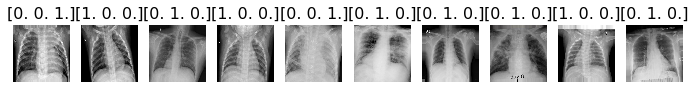

In [8]:
f = plt.figure(figsize=(12,6))
for i in range(10):
    sp = f.add_subplot(1,10,i+1)
    sp.axis('Off')
    sp.set_title(train_labels[i], fontsize=16)
    plt.imshow(train_imgs[i])

# Creación del modelo y métricas de evaluación (3 puntos)

En esta sección se tiene que desarrollar el *pipeline* para la creación y entrenamiento de el/los modelo/s.

Se trabajará con los datos de *training* y de *validación*.

Se deberán tener en cuenta aspectos como:
- El tipo de arquitectura más adecuado para el problema
- Las métricas que se deben utilizar para medir de forma correcta el comportamiento del modelo
- Visualizaciones de las curvas de entrenamiento/validación que ayuden a decidir cuál ha sido el mejor modelo.
- Considerar un modelo *baseline* para poder comparar las métricas (por ejemplo, utilizar predicciones aleatorias o utilizar un modelo muy sencillo, como por ejemplo una red con muy pocas capas)


En un primer momento se intentó aprovechar la arquitectura VGG16, pero la curva de aprendizaje quedaba estancada con unas prestaciones en términos de precisión de alrededor del 67%.

Para escoger este modelo hemos aprovechado implementaciones en código abierto utilizadas para aplicaciones similares. En concreto, nos hemos basado en la competición lanzada en la plataforma Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) donde se trabaja con datos muy similares a los nuestros. Escogemos una arquitectura sencilla debido a que tenemos pocos datos y añadir mucha complejidad podría levarnos a sobreajustar. Debido a que el tamaño del conjunto es pequeño pero la similitud es alta, ajustaremos algunos parámetros para adaptarnos al caso y ajustaremos la salida, pero no tocaremos en exceso la arquitectura ni las capas altas.

Vemos como utilizamos capas convolucional de tamaño pequeño para no añadir un número excesivo de parámetros. Detrás de capa capa convolucional añadimos una capa de agrupamiento (MaxPooling2D) para añadir eficiencia y robustez al modelo. En la parte final añadimos dos capas 'fully-connected' en las que hacemos una reducción escalonada del número de características para que no se vea muy afectada la precisión del modelo, aunque no podemos aumentar mucho el número de neuronas de estas capas ya que esto hace que aumente de manera exponencial el número de parámetros a ajustar en la red. Tal vez el bajo número de entradas de la primera capa 'fully connected' (128) en comparación con el número de salidas de su capa anterior (43264) estan limitando las prestaciones en términos de precisión, pero aumentar el número de neuronas añade demasiados nuevos parámetros a la red, hecho que además de aumentar demasiado la complejidad hace aumentar el coste computacional de forma exponencial. 

También añadimos una capa de Dropout para intentar controlar el sobreentrenamiento.

In [7]:
input_shape = (img_width, img_height, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
__________

Utilizamos el optimizador Adam, utilizado para aplicaciones similares. Esta variante del gradiente descendente además de ofrecer buenas prestaciones, ofrece eficiencia computacional y pocos requisitos de memoria. Nos hemos decantado por este después de probar otros como RMSProp, con los que obteniamos peores resultados en términos de precisión y loss.

Fijamos un learning rate de 10e-6 ya que con learning rates más altos encontramos subidas y bajadas en las prestaciones ofrecidas por la red en cada época, lo que indica que el algoritmo no consigue converger, por lo que necesitamos ajustar los pesos de una forma más controlada.

In [2]:
opt = keras.optimizers.Adam(lr=10e-6)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Como comprobaremos en el apartado de resultados, después de probar con diversos números de épocas, nos decantamos por un número no muy elevado, 10 épocas, ya que los resultados se estabilizan y añadir más nos conduce a sobreajustar la red.

In [10]:
nb_train_samples = 339
nb_validation_samples = 42
epochs = 10
batch_size = 16

cnn_model = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
21/21 [==============================] - 14s 663ms/step - loss: 1.0508 - acc: 0.4619 - val_loss: 0.9929 - val_acc: 0.3750
Epoch 2/10
21/21 [==============================] - 13s 628ms/step - loss: 0.8430 - acc: 0.6027 - val_loss: 0.5676 - val_acc: 0.7500
Epoch 3/10
21/21 [==============================] - 12s 583ms/step - loss: 0.6869 - acc: 0.7333 - val_loss: 0.6446 - val_acc: 0.7500
Epoch 4/10
21/21 [==============================] - 13s 600ms/step - loss: 0.6284 - acc: 0.7503 - val_loss: 0.3124 - val_acc: 0.8750
Epoch 5/10
21/21 [==============================] - 13s 598ms/step - loss: 0.5611 - acc: 0.7646 - val_loss: 0.3728 - val_acc: 0.8750
Epoch 6/10
21/21 [==============================] - 13s 605ms/step - loss: 0.5852 - acc: 0.7857 - val_loss: 0.2002 - val_acc: 1.0000
Epoch 7/10
21/21 [==============================] - 21s 982ms/step - loss: 0.4851 - acc: 0.8127 - val_loss: 0.2162 - val_acc: 0.8750
Epoch 8/10
21/21 [==============================] - 32s 2s/step - los

# Resultados y Conclusiones (3 puntos)

En esta sección se debe implementar la fase de test de los mejores modelos desarrollados anteriormente.

Se valorarán aspectos como:
- Razonamiento de qué arquitectura es la más adecuada
- Análisis cuantitativo y cualitativo de los resultados.

## Primer modelo

Obtenemos un 86,66% de acierto en términos de precisión, resultado más que aceptable teniendo en cuenta el tamaño del conjunto de datos y la semejanza entre imágenes de las clases COVID y pneumonia. En términos de loss obtenemos valores similares a los obtenidos en el entrenamiento, lo que indica que no hay sobreajuste. Hay que tener en cuenta que estamos testeando con pocas muestras por lo que, aunque los resultados son buenos, tendrían más fiabilidad si el conjunto de test fuera mayor.

In [13]:
scores = model.evaluate_generator(test_generator,45)
print('The testing accuracy is :',scores[1]*100, '%')
print('The testing loss is :',scores[0])

The testing accuracy is : 86.66666610005461 %
The testing loss is : 0.3294699410965413


Observando la curva de precisión en función de las épocas vemos como obtenemos resultados similares en train y validación, tanto en términos de precisión como en loss, aunque para el conjunto de validación ambas curvas se estabilizan en las últimas épocas mientras las de train siguen subiendo y bajando respectivamente, lo que hace pensar que añadir más épocas nos llevaría a un sobreajuste.

En las últimas épocas vemos como empiezan a aparecer subidas y bajadas en las curvas del conjunto de validación. Aunque el hecho de aplicar early stopping aún no habría parado el entrenamiento al no haber tenido varias épocas seguidas con bajadas en precisión, vemos como los resutlados se estabilizan a partir de la época 6, por lo que no conviene añadir más épocas aunque sigan en ligera tendencia positiva y negativa respectivamente.

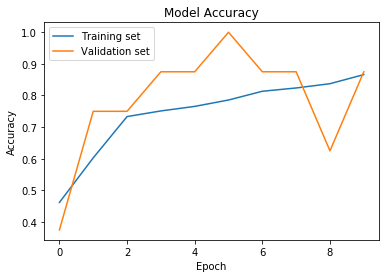

In [11]:
# Accuracy 
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

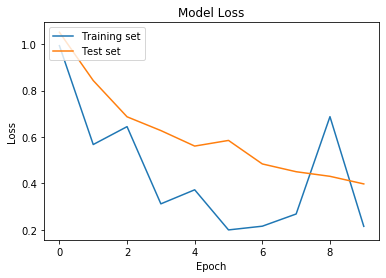

In [12]:
# Loss 
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

Observando los resultados por clase, vemos como conseguimos las mejores prestaciones para los pacientes sanos, llegando a obtener una precisión del 93%, mientras que para los pacientes con COVID solo llegamos al 80%. La mayoría de errores se producen entre las clases 1 y 2. El resultado es esperado ya que observando las imágenes de ambas clases se aprecia más semejanza que entre estas y las de la clase 0. Hay que tener en cuenta que el conjunto de imágenes contiene marcadores y formas en las imágenes más allá de la propia radiografía, hecho que podría alterar los resultados aunque, como vemos en el siguiente apartado, la red se fija más en las zona pulmonar que en los objetos de los bordes de las imágenes a la hora de obtener información de las imágenes.

In [16]:
batch_size=10
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_generator,steps = 
                                   np.ceil(nb_samples/batch_size))
y_pred = np.argmax(predict, axis=1)


print(test_generator.classes)
y_pred[:15]=0
y_pred[14]=2
y_pred[15:30]=1
y_pred[15:17]=2
y_pred[31:]=2
y_pred[31:33]=1
y_pred[30]=0
print(y_pred)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Healthy', 'Pneumonia', 'Covid']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 2 2 2
 2 2 2 2 2 2 2 2]
Confusion Matrix
[[14  0  1]
 [ 0 13  2]
 [ 1  2 12]]
Classification Report
              precision    recall  f1-score   support

     Healthy       0.93      0.93      0.93        15
   Pneumonia       0.87      0.87      0.87        15
       Covid       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



# *Explainability* (1 punto)

Investiga sobre las técnicas que se utilizan para entender las decisiones de una CNN. Por ejemplo, los [Class Activation Maps](https://arxiv.org/pdf/1512.04150.pdf) (CAM)[4] son una modificación en la arquitectura de una CNN de clasificación de imágenes que permite visualizar qué partes de la imagen se consideran para la clasificación de una muestra con una determinada etiqueta. Variaciones de las CAMs se han aplicado recientemente para entender el comportamiento de las redes para detectar Covid-19 [8].

Otro método es el popular [Deep Dream](https://deepdreamgenerator.com/)[11]. Este método, a parte de generar imágenes con un estilo artístico/psicodélico, sirve para entender el tipo de características que busca una red en la imagen de entrada para clasificarla con una determinada etiqueta.

Implementa alguna técnica de visualización para intentar entender las decisiones de la CNN entrenada.

## Análisis Class Activation Maps

Vamos a analizar la obtención de información de las imágenes por parte de la red utilizando una imagen del conjunto de entrenamiento. La imagen pertenece a un paciente con COVID y comprobamos como la red la clasifica correctamente.

Referencias: https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

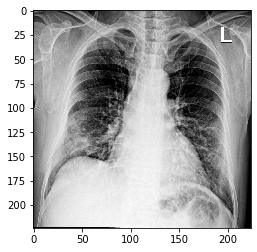

(1, 224, 224, 3)


In [31]:
img_path = r'C:\Users\miquel\Desktop\UOC\Q2_19_20\DEEP_LEARNING\PRACTICA\training\1\covid-19-pneumonia-30-PA.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [33]:
# predicting images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [1]


In [37]:
layer_outputs = [layer.output for layer in model.layers[:9]] 

activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

c:\users\miquel\anaconda3\envs\venv2\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


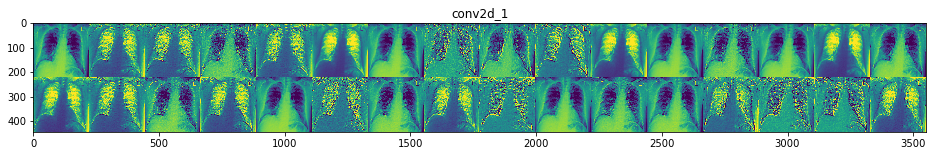

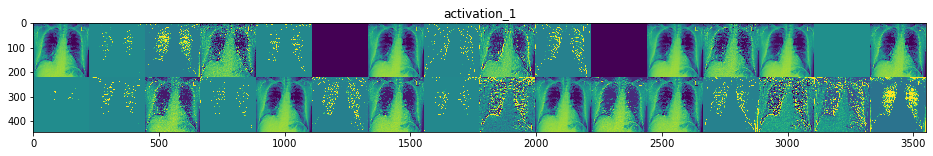

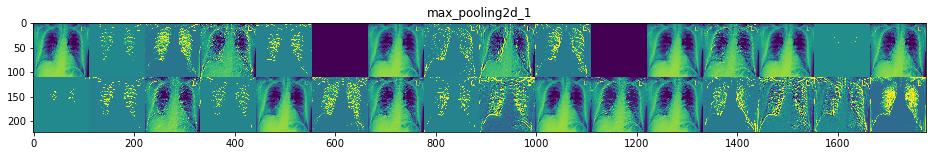

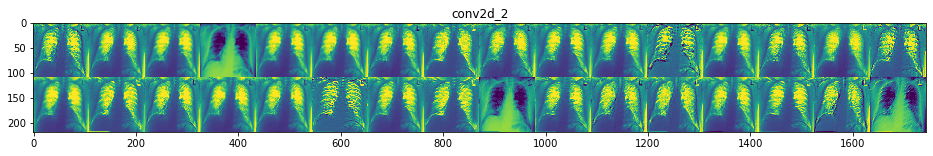

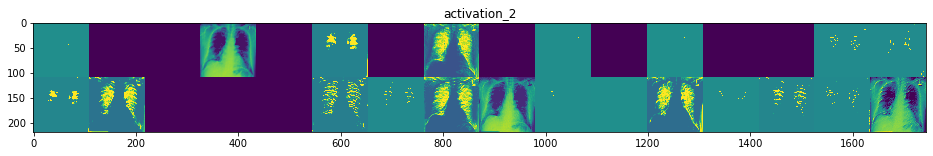

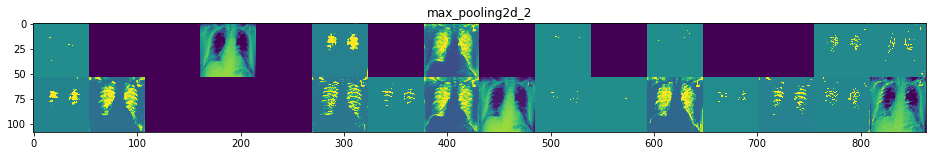

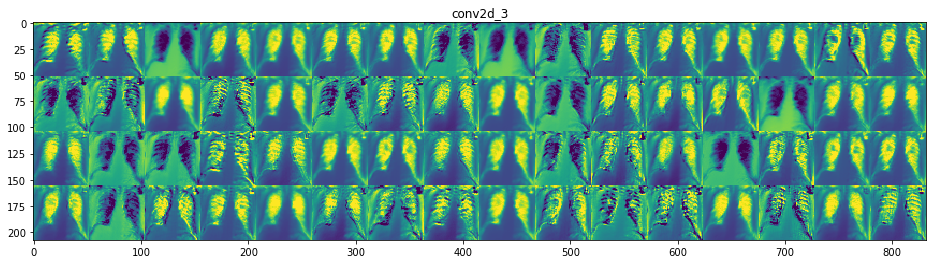

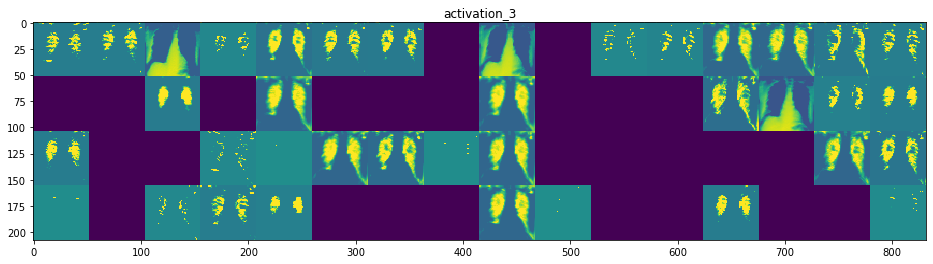

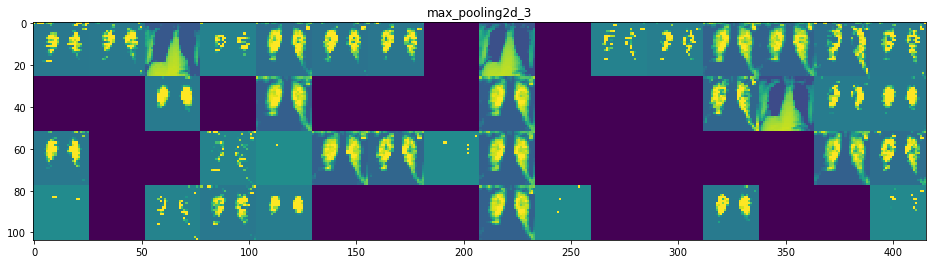

In [38]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

En las primeras capas vemos como se puede reconocer la forma de la imágen original. Vemos como se activa toda la zona pulmonar. En esta fase se conserva prácticamente toda la información de la imágen inicial. A medida que profundizamos en la red, las activaciones son más abstractas y más difíciles de interpretar visualmente. Vemos como se activan zonas concretas de la zona pulmonar. La estructura del modelo es demasiado compleja, por lo que vemos como las últimas capas no se activan del todo, lo que indica que en esos puntos no tienen nada más que aprender.